<a href="https://colab.research.google.com/github/vatsalsaglani/DL-for-coders-part1-2019/blob/master/DL_LESSON_2(2019)SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.tabular import *

There are some things that can affect the model, 
1.   Leaning Rate
2.   Epochs,

These are the two things we can tune and there ins't much we can tune.



<h2>Learning Rate too **High**</h2>

The error rate is very high for most of the cases.

<h2>Learning Rate too **Low**</h2>

The error rate does improve but very very slowly, training loss will be higher than the validation loss which means that the model ins't fitted enough. So we could increase the **ephocs** or we could increse the _**learning__rate**_

To get a plot of _validation_ and _training_ loss we can use the the piece of code
**_```modelName.plot__losses()```_**

<h2>Too few epochs</h2>

This condition is kinda similar to _low learning rate_ condition. 

<h2>Too many epochs</h2>

Its very hard to **overfit** using deep learning so if we have a huge number of **epochs** the model keep on learning from the same data batches and it could be good for the data that we have but it wouldn't be good for other outside data. 

To tell that a model is overfitting we can check the error rate and observe that it continues to impove for a while and then becomes worse. 

<center><h1>Lesson 2: SGD</h1></center>

**SGD** stands for **_Stochastic Gradient Descent_** which is an **optimization** method commonly used in neural networks. 

<h2>Linear Regression Problem</h2>

The goal of Linear Regression is to fit a line to a set of points.

In [0]:
n = 100

Generated Data, matrix of size _100 x 2_

In [5]:
x = torch.ones(n, 2)  # tensor of n(rows) x 2(columns)
x[:, 0].uniform_(-1., 1) # index into ':' every single value on the axis. .unifrom grabs a uniform random number.
x[:5]

tensor([[ 0.6177,  1.0000],
        [ 0.5480,  1.0000],
        [-0.7633,  1.0000],
        [-0.2761,  1.0000],
        [ 0.3306,  1.0000]])

In [23]:
x.shape

torch.Size([100, 2])

a1 = 3, a2 = 2; coefficients

In [18]:
a = tensor(3., 2); a # tensor(slope, intercept)

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n) # random number to add some ones.

In [17]:
x[:,0].shape

torch.Size([100])

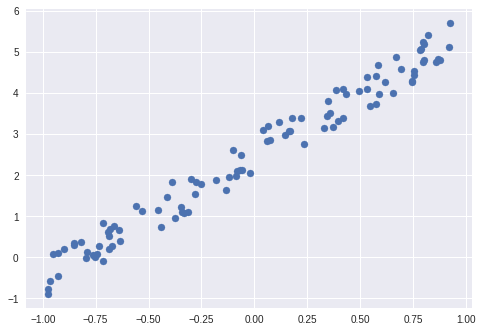

In [10]:
plt.scatter(x[:,0], y)

We need to find **parameters** _(weights)_ _```a```_ such that the _error_ between the point and the line _```x@a```_  _minimizes_. Here ```a``` is unknown. For a _regression_ problem the most common _error_ or _loss function_ is the **```mean squared error```**

Let's pretend that we don't know the value of _```a```_ (which we know as we have declared it) to get a line to divide the points. 

In [0]:
def mse(y_hat, y): return((y_hat - y)**2).mean()

Supposing we believe _```a = (-1.0, 1.0)```_ then we compute the _```y_hat```_ which is our _prediction_ and then compute our error. 

In [0]:
a = tensor(-1., 1.)

In [0]:
y_hat = x@a

In [31]:
mse(y_hat, y)

tensor(7.6707)

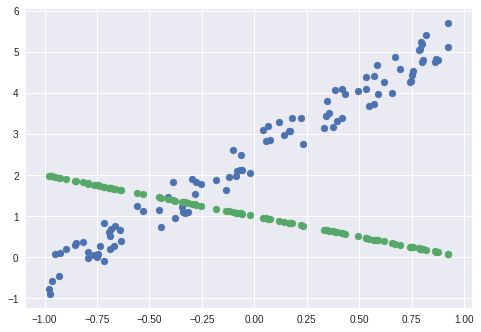

In [32]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

Until now we have specified a _model (linear regression)_ and the _evaluation criteria (or a loss function)_. Now we need to handle optimization; i.e., how do we find the best value _```a```_. ? _How do we find the best fitting linear regression?_

<h2>Gradient Descent</h2>

**Gradient Descent** is an algorithm that minimizes function. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves towards a set of parameter values that minimizes the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient. 

In [33]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad) # a -  gradient*learning rate
    a.grad.zero_() # make the gradient zero

In [39]:
lr = 1e-1
for t in range(100): update()

tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)
tensor(0.0934, grad_fn=<MeanBackward1>)


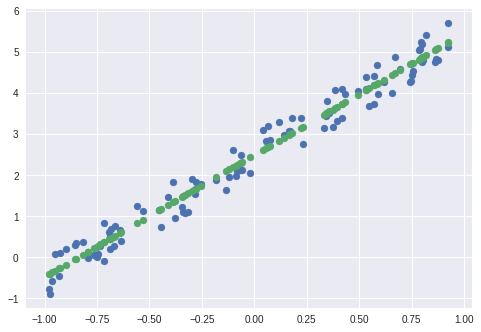

In [40]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)

<h2>Animation</h2>

In [0]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [0]:
!sudo add-apt-repository ppa:mc3man/trusty-media -y
!sudo apt-get update -y
!sudo apt-get install ffmpeg -y
!sudo apt-get install frei0r-plugins

In [43]:
a = nn.Parameter(tensor(-1., 1.))

fig = plt.figure()
plt.scatter(x[:, 0], y, c = 'orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval = 20)